# Pandas

*Pandas* is the premier Python package for data analysis. Pandas is built around the concept of *series* (akin to Numpy vectors) and *data frames* (akin to Numpy matrices). Unlike their Numpy counterparts, Pandas has a rich API that often makes series and data frames more convenient to work with.

The source data we will be playing around with are weather measurements in Montreal in 2012. As is typical, the data is found in a CSV-file (comma-separated values). Pandas has an incredibly useful `read_csv` function.

First though, let's import Pandas. Conventionally it is given the name `pd`.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Now let us read the CSV file and display it.

In [2]:
data = pd.read_csv('data/Montreal.csv')
data.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


As you can see, Jupyter notebooks have nice integration with Pandas allowing us to see dataframes displayed like actual human data.

Every data frame has an *index* and a number of *columns*. It's useful to double-check after reading a CSV file to ensure that everything is up to scratch. (I maybe don't need to tell you this, but there are **A LOT** of shady CSV files out there.)

In [3]:
data.index

RangeIndex(start=0, stop=8784, step=1)

In [4]:
data.dtypes

Date/Time              object
Temp (C)              float64
Dew Point Temp (C)    float64
Rel Hum (%)             int64
Wind Spd (km/h)         int64
Visibility (km)       float64
Stn Press (kPa)       float64
Weather                object
dtype: object

This looks mostly okay, except that we would like our data-frame to be indexed by the date and time, rather than by a number that doesn't really mean that much to us. Let's fix that.

In [5]:
data = pd.read_csv('data/Montreal.csv', index_col='Date/Time', parse_dates=['Date/Time'])
data.index

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 01:00:00',
               '2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00',
               '2012-01-01 06:00:00', '2012-01-01 07:00:00',
               '2012-01-01 08:00:00', '2012-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Date/Time', length=8784, freq=None)

As you can see, the index is now a `DateTimeIndex`, and Pandas was able to parse the dates automatically for us.

If you like, it's always possible to access the back-end Numpy arrays that Pandas use to store its data. For example:

In [6]:
data.index[0]

Timestamp('2012-01-01 00:00:00')

In [7]:
data.values

array([[-1.8, -3.9, 86, ..., 8.0, 101.24, 'Fog'],
       [-1.8, -3.7, 87, ..., 8.0, 101.24, 'Fog'],
       [-1.8, -3.4, 89, ..., 4.0, 101.26, 'Freezing Drizzle,Fog'],
       ...,
       [-0.5, -1.5, 93, ..., 4.8, 99.95, 'Snow'],
       [-0.2, -1.8, 89, ..., 9.7, 99.91, 'Snow'],
       [0.0, -2.1, 86, ..., 11.3, 99.89, 'Snow']], dtype=object)

As you can see, the data type of `data.values` is `object`, because our data is heterogeneous (it's a mix of numbers and strings). This makes working with the Numpy array directly somewhat awkward. On the other hand, Pandas seamlessly deals with columns of different types.

Pandas lets us grab specific columns,

In [8]:
data['Temp (C)']

Date/Time
2012-01-01 00:00:00    -1.8
2012-01-01 01:00:00    -1.8
2012-01-01 02:00:00    -1.8
2012-01-01 03:00:00    -1.5
2012-01-01 04:00:00    -1.5
2012-01-01 05:00:00    -1.4
2012-01-01 06:00:00    -1.5
2012-01-01 07:00:00    -1.4
2012-01-01 08:00:00    -1.4
2012-01-01 09:00:00    -1.3
2012-01-01 10:00:00    -1.0
2012-01-01 11:00:00    -0.5
2012-01-01 12:00:00    -0.2
2012-01-01 13:00:00     0.2
2012-01-01 14:00:00     0.8
2012-01-01 15:00:00     1.8
2012-01-01 16:00:00     2.6
2012-01-01 17:00:00     3.0
2012-01-01 18:00:00     3.8
2012-01-01 19:00:00     3.1
2012-01-01 20:00:00     3.2
2012-01-01 21:00:00     4.0
2012-01-01 22:00:00     4.4
2012-01-01 23:00:00     5.3
2012-01-02 00:00:00     5.2
2012-01-02 01:00:00     4.6
2012-01-02 02:00:00     3.9
2012-01-02 03:00:00     3.7
2012-01-02 04:00:00     2.9
2012-01-02 05:00:00     2.6
                       ... 
2012-12-30 18:00:00   -12.6
2012-12-30 19:00:00   -13.4
2012-12-30 20:00:00   -13.8
2012-12-30 21:00:00   -13.8
2012-12-30

Or rows,

In [9]:
data[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Since the index is of datetime type, we can also do this, to grab the values from January.

In [10]:
data['2012-01-01':'2012-01-31']

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog
2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog


But in fact, this also works.

In [11]:
data['2012-01']

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog
2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog


You can combine indexing too. Let's get the weather types on November 2nd.

In [12]:
data['2012-11-02']['Weather']

Date/Time
2012-11-02 00:00:00          Cloudy
2012-11-02 01:00:00          Cloudy
2012-11-02 02:00:00          Cloudy
2012-11-02 03:00:00          Cloudy
2012-11-02 04:00:00          Cloudy
2012-11-02 05:00:00    Rain Showers
2012-11-02 06:00:00            Rain
2012-11-02 07:00:00            Rain
2012-11-02 08:00:00            Rain
2012-11-02 09:00:00            Rain
2012-11-02 10:00:00            Rain
2012-11-02 11:00:00         Drizzle
2012-11-02 12:00:00         Drizzle
2012-11-02 13:00:00         Drizzle
2012-11-02 14:00:00          Cloudy
2012-11-02 15:00:00          Cloudy
2012-11-02 16:00:00          Cloudy
2012-11-02 17:00:00          Cloudy
2012-11-02 18:00:00          Cloudy
2012-11-02 19:00:00    Rain Showers
2012-11-02 20:00:00    Rain Showers
2012-11-02 21:00:00          Cloudy
2012-11-02 22:00:00    Rain Showers
2012-11-02 23:00:00    Rain Showers
Name: Weather, dtype: object

The first step in data analysis is always to plot something. Pandas makes this easy, and you don't have to deal with Matplotlib directly.

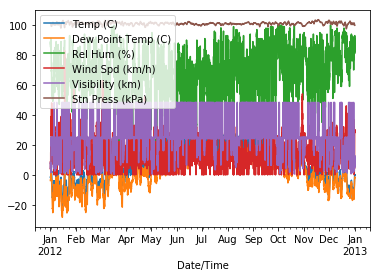

In [13]:
data.plot()

Okay, that's not very enlightening. Let's try to be more specific.

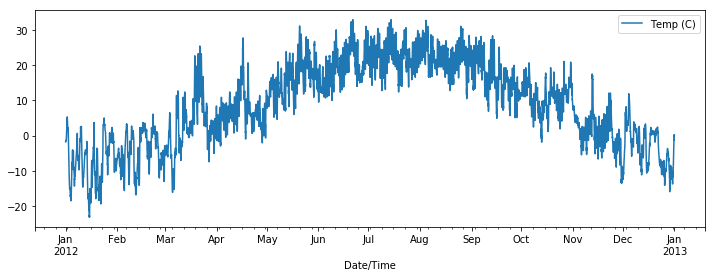

In [14]:
data.plot(y='Temp (C)', figsize=(12,4))

Let's see if the temperature and the dew point are linked.

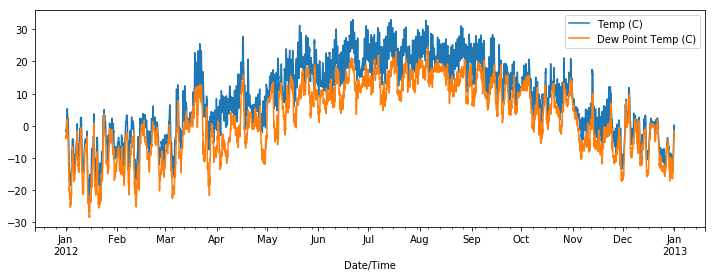

In [15]:
ax = data.plot(y='Temp (C)', figsize=(12,4))
data.plot(y='Dew Point Temp (C)', ax=ax)

Looks like that's the case. A scatter plot might make this relationship more clear. The red line corresponds to *dew point = temp*, which is when the air is completely saturated with humidity. As we can see, the temperature seems to be never smaller than the dew point.

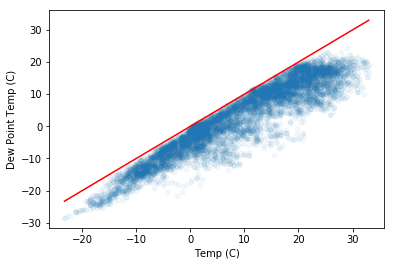

In [16]:
data.plot.scatter('Temp (C)', 'Dew Point Temp (C)', alpha=0.05)
temps = data.min()['Temp (C)'], data.max()['Temp (C)']
plt.plot(temps, temps, color='red')

We might reasonably expect the humidity to be high when the actual temperature is close to the dew point. Let's see if that's the case. First, create a new column with the difference between temperature and dew point. Then make a new scatter plot.

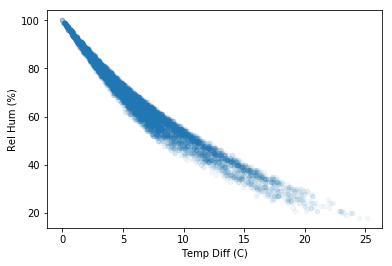

In [17]:
data['Temp Diff (C)'] = data['Temp (C)'] - data['Dew Point Temp (C)']

data.plot.scatter('Temp Diff (C)', 'Rel Hum (%)', alpha=0.05)

This looks quite revealing indeed.

Let's look at the "Weather" column. Unlike the other columns, it acts as a category rather than as a number. Use `.value_counts()` to get an overview.

In [18]:
data['Weather'].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

Unfortunately this sort of column is not very useful. We'd rather have columns called "Clear", "Cloudy", etc, which are booleans. Let's try to do that. You can access string methods under the `str` attribute. Let's split on comma and expand.

In [19]:
temp = data['Weather'].str.split(',', expand=True)
temp.head()

,0,1,2
Date/Time,,,
2012-01-01 00:00:00,Fog,None,None
2012-01-01 01:00:00,Fog,None,None
2012-01-01 02:00:00,Freezing Drizzle,Fog,None
2012-01-01 03:00:00,Freezing Drizzle,Fog,None
2012-01-01 04:00:00,Fog,None,None


As you can see we now get a dataframe with three columns, indicating that there are only ever three different weather tags for any particular hour. Let's get a list of all weather tags. Since `set` removes duplicates, let's use that. Let's also remove `None`.

In [20]:
tags = sorted(set(temp.values.flatten()) - {None})
tags

['Blowing Snow',
 'Clear',
 'Cloudy',
 'Drizzle',
 'Fog',
 'Freezing Drizzle',
 'Freezing Fog',
 'Freezing Rain',
 'Haze',
 'Heavy Rain Showers',
 'Ice Pellets',
 'Mainly Clear',
 'Moderate Rain',
 'Moderate Rain Showers',
 'Moderate Snow',
 'Mostly Cloudy',
 'Rain',
 'Rain Showers',
 'Snow',
 'Snow Grains',
 'Snow Pellets',
 'Snow Showers',
 'Thunderstorms']

Now we can get a boolean dataframe indicating which days are foggy by using `temp == 'Fog'`. We also need to apply maximum on the rows, though, since we're only interested in whether it was foggy, not whether "Fog" was first, second or third in the list.

In [21]:
(temp == 'Fog').aggregate('max', axis=1)

Date/Time
2012-01-01 00:00:00     True
2012-01-01 01:00:00     True
2012-01-01 02:00:00     True
2012-01-01 03:00:00     True
2012-01-01 04:00:00     True
2012-01-01 05:00:00     True
2012-01-01 06:00:00     True
2012-01-01 07:00:00     True
2012-01-01 08:00:00     True
2012-01-01 09:00:00     True
2012-01-01 10:00:00     True
2012-01-01 11:00:00     True
2012-01-01 12:00:00     True
2012-01-01 13:00:00     True
2012-01-01 14:00:00     True
2012-01-01 15:00:00     True
2012-01-01 16:00:00    False
2012-01-01 17:00:00    False
2012-01-01 18:00:00    False
2012-01-01 19:00:00    False
2012-01-01 20:00:00    False
2012-01-01 21:00:00    False
2012-01-01 22:00:00    False
2012-01-01 23:00:00    False
2012-01-02 00:00:00    False
2012-01-02 01:00:00    False
2012-01-02 02:00:00    False
2012-01-02 03:00:00    False
2012-01-02 04:00:00    False
2012-01-02 05:00:00    False
                       ...  
2012-12-30 18:00:00    False
2012-12-30 19:00:00    False
2012-12-30 20:00:00    False
2012

Great. Let's now add a bunch of columns to our original data frame.

In [22]:
for tag in tags:
    data[tag] = (temp == tag).aggregate('max', axis=1)
data.dtypes

Temp (C)                 float64
Dew Point Temp (C)       float64
Rel Hum (%)                int64
Wind Spd (km/h)            int64
Visibility (km)          float64
Stn Press (kPa)          float64
Weather                   object
Temp Diff (C)            float64
Blowing Snow                bool
Clear                       bool
Cloudy                      bool
Drizzle                     bool
Fog                         bool
Freezing Drizzle            bool
Freezing Fog                bool
Freezing Rain               bool
Haze                        bool
Heavy Rain Showers          bool
Ice Pellets                 bool
Mainly Clear                bool
Moderate Rain               bool
Moderate Rain Showers       bool
Moderate Snow               bool
Mostly Cloudy               bool
Rain                        bool
Rain Showers                bool
Snow                        bool
Snow Grains                 bool
Snow Pellets                bool
Snow Showers                bool
Thundersto

Beautiful. Now we can get some more information on the specific types of weather.

In [23]:
weather = data.loc[:, 'Blowing Snow':'Thunderstorms']
weather.aggregate('sum').sort_values(ascending=False)

Mainly Clear             2106
Mostly Cloudy            2069
Cloudy                   1728
Clear                    1326
Snow                      508
Rain                      454
Fog                       422
Rain Showers              210
Drizzle                   139
Snow Showers               66
Haze                       29
Freezing Drizzle           27
Thunderstorms              27
Freezing Rain              22
Blowing Snow               21
Ice Pellets                13
Moderate Snow               6
Freezing Fog                4
Snow Grains                 2
Heavy Rain Showers          1
Moderate Rain               1
Moderate Rain Showers       1
Snow Pellets                1
dtype: int64

It seems reasonable to believe that there's a relationship between foggy weather and humidity. Let's check that by returning to one of our earlier scatter plots, and plotting two separate data sets, foggy and non-foggy.

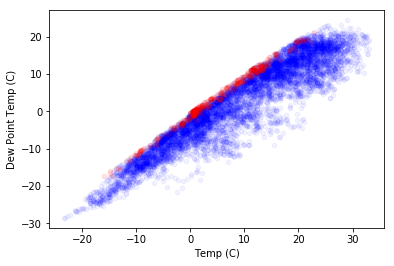

In [24]:
fig, ax = plt.subplots(1, 1)
data[~data['Fog']].plot.scatter('Temp (C)', 'Dew Point Temp (C)', color='blue', ax=ax, alpha=0.05)
data[data['Fog']].plot.scatter('Temp (C)', 'Dew Point Temp (C)', color='red', ax=ax, alpha=0.1)

We can go further by box-plotting the humidity when compared with various forms of weather conditions that we suspect may be linked to it.

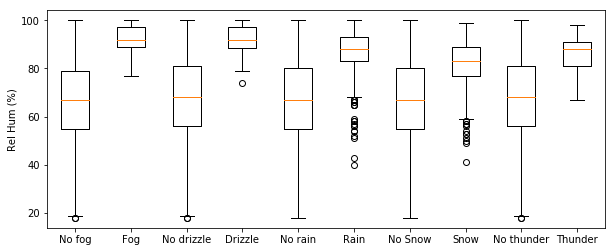

In [25]:
humidity = data['Rel Hum (%)']

# This is equivalent to fog = data['Fog'], etc.
fog, drizzle, rain, snow, thunder = (data[x] for x in ['Fog', 'Drizzle', 'Rain', 'Snow', 'Thunderstorms'])

plt.figure(figsize=(10,4))
plt.boxplot(
    [humidity[~fog], humidity[fog], 
     humidity[~drizzle], humidity[drizzle],
     humidity[~rain], humidity[rain],
     humidity[~snow], humidity[snow],
     humidity[~thunder], humidity[thunder]], 
    labels=['No fog', 'Fog', 'No drizzle', 'Drizzle', 'No rain', 'Rain', 'No Snow', 'Snow', 'No thunder', 'Thunder']
)
plt.ylabel('Rel Hum (%)')

## Exercise

The data file `311-service-requests.csv` contains data on complaints made to the New York City complaint phone number *311* over the course of a few days in October 2013. It includes time of call, locations, type of complaint and the name of the handling department.

Try to explore this data set as well as you can in the remaining time and see what sorts of conclusions you can draw. Things you might want to investigate are, for example:

- Plot all the latitudes and longitudes. Does the result look like a map?
- What are the most common complaint types? How many complaint types are there?
- Is there a connection between location, borough and complaint type?
- How long does it take complaints to be adressed? Does it depend on handling agency?

I recommend using this code to load the data. If you get a warning about data types, like below, don't worry about it.

In [26]:
columns = [
    'Created Date', 'Closed Date', 'Agency', 'Complaint Type', 'Descriptor',
    'Location Type', 'Incident Zip', 'City', 'Borough', 'Latitude', 'Longitude',
]
df = pd.read_csv('data/311-service-requests.csv', usecols=columns, index_col='Created Date',
                 parse_dates=['Created Date', 'Closed Date'])
df['Incident Zip'] = pd.to_numeric(df['Incident Zip'], errors='coerce')
df.head()

/home/eivindf/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Borough,Latitude,Longitude
Created Date,,,,,,,,,,
2013-10-31 02:08:41,NaT,NYPD,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432.0,JAMAICA,QUEENS,40.708275,-73.791604
2013-10-31 02:01:04,NaT,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378.0,MASPETH,QUEENS,40.721041,-73.909453
2013-10-31 02:00:24,2013-10-31 02:40:32,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032.0,NEW YORK,MANHATTAN,40.843330,-73.939144
2013-10-31 01:56:23,2013-10-31 02:21:48,NYPD,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023.0,NEW YORK,MANHATTAN,40.778009,-73.980213
2013-10-31 01:53:44,NaT,DOHMH,Rodent,Condition Attracting Rodents,Vacant Lot,10027.0,NEW YORK,MANHATTAN,40.807691,-73.947387
